In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/namrathan09/CODSOFT/main/Titanic-Dataset.csv")


In [3]:
df.shape


(891, 12)

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum()

0

In [8]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,index,Survived
0,0,549
1,1,342


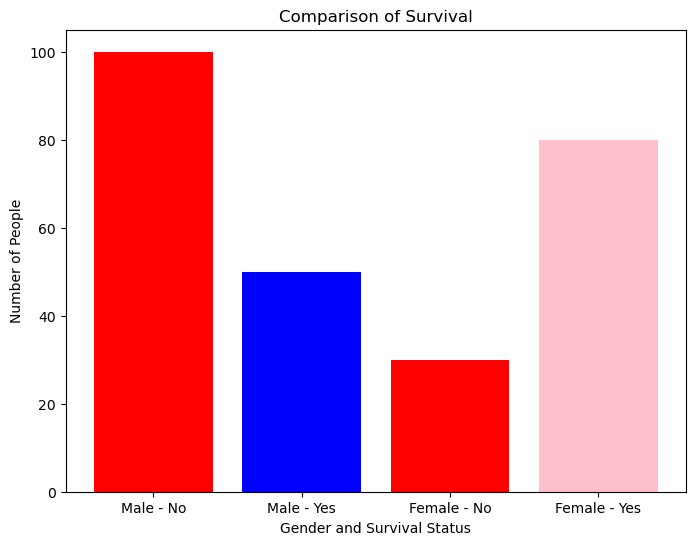

In [9]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}  # replace with actual counts
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","red","pink"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [10]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [12]:
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [14]:
inputs.drop(["Sex"],axis="columns",inplace=True)

In [15]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [16]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [17]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [18]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [19]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

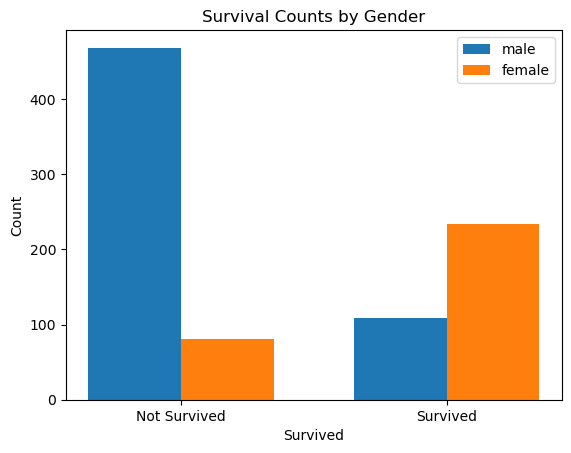

In [20]:
counts = df.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.35
index = counts.index

# Plotting
fig, ax = plt.subplots()

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')
# Setting labels and title
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Display the plot
plt.show()

In [21]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)


In [22]:
X_train

,Pclass,Age,Fare,female,male
609,1,40.000000,153.4625,1,0
815,1,29.699118,0.0000,0,1
743,3,24.000000,16.1000,0,1
752,3,33.000000,9.5000,0,1
539,1,22.000000,49.5000,1,0
...,...,...,...,...,...
269,1,35.000000,135.6333,1,0
456,1,65.000000,26.5500,0,1
77,3,29.699118,8.0500,0,1
679,1,36.000000,512.3292,0,1


In [23]:
X_test

,Pclass,Age,Fare,female,male
653,3,29.699118,7.8292,1,0
546,2,19.000000,26.0000,1,0
725,3,20.000000,8.6625,0,1
457,1,29.699118,51.8625,1,0
451,3,29.699118,19.9667,0,1
...,...,...,...,...,...
830,3,15.000000,14.4542,1,0
760,3,29.699118,14.5000,0,1
277,2,29.699118,0.0000,0,1
117,2,29.000000,21.0000,0,1


In [24]:
y_train


609    1
815    0
743    0
752    0
539    1
      ..
269    1
456    0
77     0
679    1
399    1
Name: Survived, Length: 712, dtype: int64

In [25]:
y_test

653    1
546    1
725    0
457    1
451    0
      ..
830    1
760    0
277    0
117    0
190    1
Name: Survived, Length: 179, dtype: int64

In [26]:
inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


In [27]:
import seaborn as sns

<AxesSubplot:>

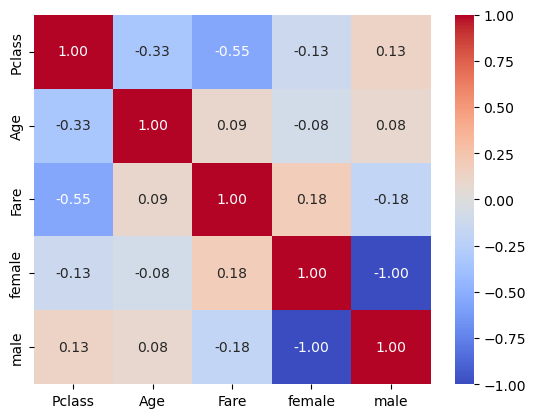

In [28]:
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [29]:
model=RandomForestClassifier()

In [30]:
model.fit(X_train,y_train)


RandomForestClassifier()

In [31]:
model.score(X_test,y_test)

0.8100558659217877

In [32]:
pre=model.predict(X_test)

In [33]:
matrices=r2_score(pre,y_test)
matrices

0.16721401204159825